In [1]:
import pandas as pd
import numpy as np
import re
import collections
import contractions
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import keras
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences
import pickle
import nltk
import os
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#from google.colab import files

In [2]:
import warnings
warnings.filterwarnings("ignore")
#import os
#os.environ["KMP_SETTINGS"] = "false"

from sklearn import preprocessing
import time

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

In [4]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("spam_ham")

<Experiment: artifact_location='./artifacts/5', experiment_id='5', lifecycle_stage='active', name='spam_ham', tags={}>

In [5]:
 def get_directory_path(dir_name, create_dir=True):

        cwd = os.getcwd()
        dir = os.path.join(cwd, dir_name)
        if create_dir:
            if not os.path.exists(dir):
                os.mkdir(dir, mode=0o755)

        return dir

In [6]:
os.getcwdb()

b'C:\\Users\\deekshitha\\Downloads\\SPAM CLASSIFIER'

In [7]:
image_dir = get_directory_path("lstm_images")

In [8]:
#pip install contractions

In [9]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [11]:
df.columns = ["type","SMS"]

In [12]:
graph__data_distribution_png = os.path.join(image_dir,'Data_Distribution.png')

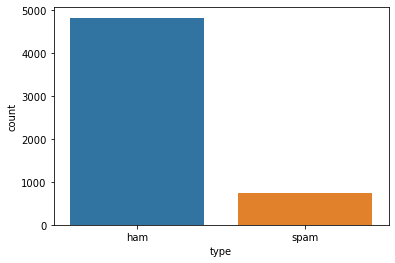

In [13]:
fig_data =sns.countplot(df["type"])

fig_data.figure.savefig(graph__data_distribution_png)
#graph_data_distribution_png = os.path.join(image_dir,fig.savefig("Data_Distribution.png"))

#graph_data_distribution_png = os.path.join(image_dir,"Data_Distribution.png")
#fig.savefig("Data_Distribution.png")
#files.download("datadistribution.png")

In [14]:
'''lem = WordNetLemmatizer()
def preprocessing(df):
    text = contractions.fix(df)# converting shortened words to original (Eg:"I'm" to "I am")
    text = text.lower() # lower casing the sms
    text = re.sub(r'https?://S+|www.S+', "", text).strip() #removing url
    text = re.sub("[^a-z ]", "", text) # removing symbols and numbes
    text = text.split() #splitting
    # lemmatization and stopword removal
    text = [lem.lemmatize(word) for word in text if not word in set(stopwords.words("english"))]
    text = " ".join(text)
    return text
X = df["text"].apply(preprocessing)
'''

'lem = WordNetLemmatizer()\ndef preprocessing(df):\n    text = contractions.fix(df)# converting shortened words to original (Eg:"I\'m" to "I am")\n    text = text.lower() # lower casing the sms\n    text = re.sub(r\'https?://S+|www.S+\', "", text).strip() #removing url\n    text = re.sub("[^a-z ]", "", text) # removing symbols and numbes\n    text = text.split() #splitting\n    # lemmatization and stopword removal\n    text = [lem.lemmatize(word) for word in text if not word in set(stopwords.words("english"))]\n    text = " ".join(text)\n    return text\nX = df["text"].apply(preprocessing)\n'

In [15]:
'''
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder()
y = lb_enc.fit_transform(df["type"])
'''

'\nfrom sklearn.preprocessing import LabelEncoder\nlb_enc = LabelEncoder()\ny = lb_enc.fit_transform(df["type"])\n'

In [16]:
# preprocessing the data by tokenizing and padding the textual data and encoding the categorical classification labels
maxlen = 100
training_samples = 3000
validation_samples = 2000
testing_samples = 572
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['SMS'])
sequences = tokenizer.texts_to_sequences(df['SMS'])
word_index = tokenizer.word_index
print('Found ', len(word_index), ' unique tokens.')

label_encoder = preprocessing.LabelEncoder()
classification = label_encoder.fit_transform(df['type'])

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(classification)
print('Shape of the tensor containing the SMSes:', data.shape)
print('Shape of the tensor containing the classifcation labels:', labels.shape)
# splitting the data into train, validation and test sets
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data[validation_samples: validation_samples + testing_samples]
y_test = labels[validation_samples: validation_samples + testing_samples]

Found  8920  unique tokens.
Shape of the tensor containing the SMSes: (5572, 100)
Shape of the tensor containing the classifcation labels: (5572,)


In [17]:
TOT_SIZE = len(word_index)+1
def create_model():
    lstm_model = Sequential()
    lstm_model.add(Embedding(TOT_SIZE, 32, input_length=maxlen))
    lstm_model.add(LSTM(100))
    lstm_model.add(Dropout(0.4))
    lstm_model.add(Dense(20, activation="relu"))
    lstm_model.add(Dropout(0.3))
    lstm_model.add(Dense(1, activation = "sigmoid"))
    return lstm_model
lstm_model = create_model()


In [18]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           285472    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 20)                2020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 340,713
Trainable params: 340,713
Non-trai

In [19]:
batch_size=16

In [20]:
lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

tik = time.time()
history = lstm_model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_val, y_val))
tok = time.time()
print(tik, tok, tok-tik)

Epoch 1/10
188/188 [==============================] - 12s 50ms/step - loss: 0.2100 - accuracy: 0.9337 - val_loss: 0.0626 - val_accuracy: 0.9825
Epoch 2/10
188/188 [==============================] - 9s 46ms/step - loss: 0.0395 - accuracy: 0.9903 - val_loss: 0.0553 - val_accuracy: 0.9845
Epoch 3/10
188/188 [==============================] - 9s 47ms/step - loss: 0.0129 - accuracy: 0.9967 - val_loss: 0.0817 - val_accuracy: 0.9835
Epoch 4/10
188/188 [==============================] - 8s 45ms/step - loss: 0.0051 - accuracy: 0.9993 - val_loss: 0.0831 - val_accuracy: 0.9845
Epoch 5/10
188/188 [==============================] - 9s 45ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.0653 - val_accuracy: 0.9850
Epoch 6/10
188/188 [==============================] - 9s 48ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0872 - val_accuracy: 0.9840
Epoch 7/10
188/188 [==============================] - 10s 53ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0850 - val_accuracy: 0.98

In [21]:
# evaluating the performance of the model
values_2 = lstm_model.evaluate(x_test,y_test)
values_2
time_2 = tok-tik

18/18 [==============================] - 1s 24ms/step - loss: 8.0088e-06 - accuracy: 1.0000


In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [23]:
graph_image_loss_png = os.path.join(image_dir,'Training and validation loss.png')
graph_image_acc_png = os.path.join(image_dir, " Training and validation accuracy.png")

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

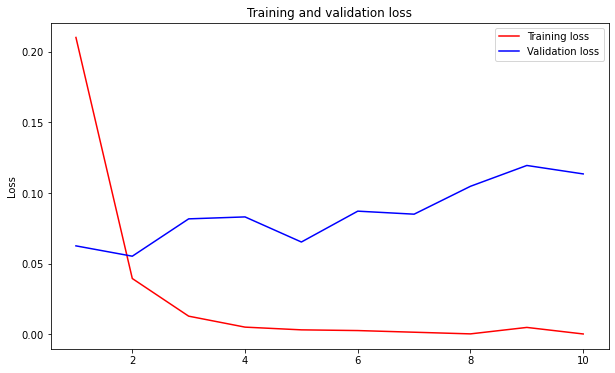

In [26]:
epochs_l = range(1, len(accuracy) + 1)
fig = plt.figure(figsize=(10, 6))
# r is for "solid red line"
plt.plot(epochs_l, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_l, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(graph_image_loss_png)
#plt.savefig('Training and validation loss.png')

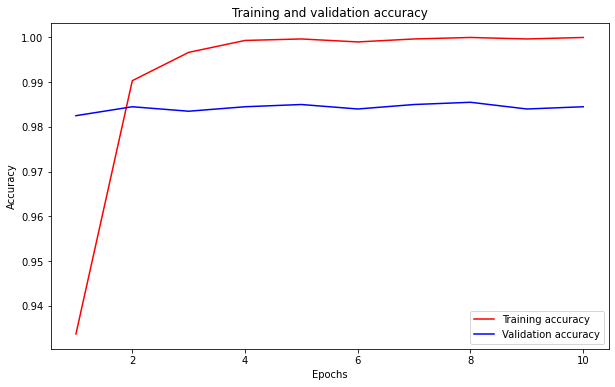

In [28]:
epochs_l = range(1, len(accuracy) + 1)
fig = plt.figure(figsize=(10, 6))
plt.plot(epochs_l, accuracy, 'r', label='Training accuracy')
plt.plot(epochs_l, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig(graph_image_acc_png)
#fig.savefig(" Training and validation accuracy.png")

In [29]:
lstm_model.save("lstm_model.h5")

In [30]:
optimizer_name='adam'

In [31]:
batch_size =16

In [39]:
epochs=10

In [43]:
num_layers = 6

In [42]:
validation_split = 0.4

In [41]:
mlflow.keras.autolog()

In [33]:
from keras.models import load_model
loaded_model_1 =load_model("lstm_model.h5")

In [44]:
with mlflow.start_run(run_name ="lstm_model"):
    run_uuid = mlflow.active_run().info.run_uuid
    print("MLflow Run ID: %s" % run_uuid)
    
    #history_dict = history.history
    
    # log parameters
    #hidden_layers
    #
    #mlflow.log_param("alpha", 0.001)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("optimizer", optimizer_name)
    mlflow.log_param("batch_size", batch_size)
    mlflow.log_param("num_layers",num_layers)
    mlflow.log_param("validation_split",validation_split)
        
    
    # calculate metrics
    mlflow.log_metric("loss", loss[-1])
    mlflow.log_metric("accuracy", accuracy[-1])
    mlflow.log_metric("val_loss",val_loss[-1] )
    mlflow.log_metric("val_accuracy", val_accuracy[-1])
    
    # log artifacts
    mlflow.log_artifacts(image_dir, "lstm_images")

    #mlflow.log_metric(key="accuracy", value=scores[1], step=dataset_count)
    mlflow.keras.log_model(loaded_model_1,"lstm_model")
    
    print("loss function use", loss[-1])

MLflow Run ID: 3568457b935045c4b866f0c6d9093acd


INFO:tensorflow:Assets written to: C:\Users\DEEKSH~1\AppData\Local\Temp\tmpox6m5xfu\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\DEEKSH~1\AppData\Local\Temp\tmpox6m5xfu\model\data\model\assets


loss function use 0.000302976171951741
